In [0]:
#loading a bunch of libraries
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

1.1 Creating dataset

In [0]:
X, y = make_classification(n_samples=50000, n_features=15, n_informative=10, n_redundant=5,
                           n_classes=2, weights=[0.7], class_sep=0.7, random_state=15)

1.2 Train Test Split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=15)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((37500, 15), (37500,), (12500, 15), (12500,))

1.3 Initializing Weight Vector and Intercept

In [0]:
#initializing weight vector 
weight_vec = np.zeros_like(X_train[0])
# initializing bias 
bias = 0
#initializing regularizier
eta0  = 0.0001
#initializing learning rate
alpha = 0.0001

1.4 Sigmoid Function

In [23]:
def sig_func(x,w,b):
    z = (np.dot(x,w.T) + b)
    return 1 / (1 + np.exp(-z))
y_hat = sig_func(X_train,weight_vec,bias)
print('y_hat',y_hat)
print('shape of sigmoid output value',y_hat.shape)

y_hat [0.5 0.5 0.5 ... 0.5 0.5 0.5]
shape of sigmoid output value (37500,)


1.5 Loss Function

In [24]:
#calculating the initial loss on train data
def loss_func(y_hat,y_train):
    return(-y_train * np.log(y_hat + 0.001) - (1 - y_train) * np.log(1 - y_hat+0.001)).mean()
loss_train = []
a = loss_func(y_hat,y_train)
loss_train.append(a)
print('loss_train',loss_train)

loss_train [0.6911491778972725]


In [25]:
y_hat_test = sig_func(X_test,weight_vec,bias)
print('y_hat_test',y_hat_test)
print('shape of sigmoid output value',y_hat_test.shape)

y_hat_test [0.5 0.5 0.5 ... 0.5 0.5 0.5]
shape of sigmoid output value (12500,)


In [26]:
loss_test = []
b = loss_func(y_hat_test,y_test)
loss_test.append(b)
print('loss on test data',loss_test)

loss on test data [0.6911491778972725]


1.6 Gradient

In [27]:
epochs = 10
N = len(X_train)
for i in range(epochs):
    for j in range(len(X_train)):
        weight_vec = ((alpha*X_train[j]*(y_train[j] - sig_func(X_train[j],weight_vec,bias))) + (1- ((alpha*eta0)/N))*weight_vec)
        bias = bias + (alpha*(y_train[j] - sig_func(X_train[j],weight_vec,bias)))
        
    y_hat = sig_func(X_train,weight_vec,bias)
    a = loss_func(y_hat,y_train)
    loss_train.append(a)
    print('loss on train data',loss_train)
    y_hat_test = sig_func(X_test,weight_vec,bias)
    b = loss_func(y_hat_test,y_test)
    loss_test.append(b)
    print('loss on test data',loss_test)
    print('*'*100)

loss on train data [0.6911491778972725, 0.402283496910999]
loss on test data [0.6911491778972725, 0.4034057453324119]
****************************************************************************************************
loss on train data [0.6911491778972725, 0.402283496910999, 0.38657555023501744]
loss on test data [0.6911491778972725, 0.4034057453324119, 0.38820924240548876]
****************************************************************************************************
loss on train data [0.6911491778972725, 0.402283496910999, 0.38657555023501744, 0.3812734765589849]
loss on test data [0.6911491778972725, 0.4034057453324119, 0.38820924240548876, 0.38309406277196917]
****************************************************************************************************
loss on train data [0.6911491778972725, 0.402283496910999, 0.38657555023501744, 0.3812734765589849, 0.3788800602156792]
loss on test data [0.6911491778972725, 0.4034057453324119, 0.38820924240548876, 0.3830940627719691

In [28]:
weight_vec

array([-0.42315311,  0.19095979, -0.14588118,  0.33814991, -0.21196623,
        0.56525978, -0.44538357, -0.09171679,  0.21795314,  0.16977398,
        0.19522044,  0.00229554, -0.07781461,  0.33882618,  0.02214234])

In [29]:
bias

-0.8500967712837227

Plotting Train and Test loss

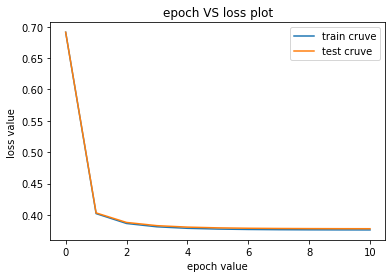

In [30]:
%matplotlib inline
import matplotlib.pyplot as plt
epochs_list = [0,1,2,3,4,5,6,7,8,9,10]
plt.plot(epochs_list,loss_train, label='train cruve')
plt.plot(epochs_list,loss_test, label='test cruve')
plt.title('epoch VS loss plot')
plt.xlabel('epoch value')
plt.ylabel('loss value ')
plt.legend()
plt.show()

Applying Sklearn LR 

In [31]:
from sklearn import linear_model
clf = linear_model.SGDClassifier(eta0=0.0001, alpha=0.0001, loss='log', random_state=15, penalty='l2', tol=1e-3, verbose=2, learning_rate='constant')
clf

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0001,
              fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
              loss='log', max_iter=1000, n_iter_no_change=5, n_jobs=None,
              penalty='l2', power_t=0.5, random_state=15, shuffle=True,
              tol=0.001, validation_fraction=0.1, verbose=2, warm_start=False)

In [32]:
clf.fit(X=X_train, y=y_train)

-- Epoch 1
Norm: 0.77, NNZs: 15, Bias: -0.316653, T: 37500, Avg. loss: 0.455552
Total training time: 0.02 seconds.
-- Epoch 2
Norm: 0.91, NNZs: 15, Bias: -0.472747, T: 75000, Avg. loss: 0.394686
Total training time: 0.03 seconds.
-- Epoch 3
Norm: 0.98, NNZs: 15, Bias: -0.580082, T: 112500, Avg. loss: 0.385711
Total training time: 0.04 seconds.
-- Epoch 4
Norm: 1.02, NNZs: 15, Bias: -0.658292, T: 150000, Avg. loss: 0.382083
Total training time: 0.05 seconds.
-- Epoch 5
Norm: 1.04, NNZs: 15, Bias: -0.719528, T: 187500, Avg. loss: 0.380486
Total training time: 0.06 seconds.
-- Epoch 6
Norm: 1.05, NNZs: 15, Bias: -0.763409, T: 225000, Avg. loss: 0.379578
Total training time: 0.07 seconds.
-- Epoch 7
Norm: 1.06, NNZs: 15, Bias: -0.795106, T: 262500, Avg. loss: 0.379150
Total training time: 0.08 seconds.
-- Epoch 8
Norm: 1.06, NNZs: 15, Bias: -0.819925, T: 300000, Avg. loss: 0.378856
Total training time: 0.09 seconds.
-- Epoch 9
Norm: 1.07, NNZs: 15, Bias: -0.837805, T: 337500, Avg. loss: 0.

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0001,
              fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
              loss='log', max_iter=1000, n_iter_no_change=5, n_jobs=None,
              penalty='l2', power_t=0.5, random_state=15, shuffle=True,
              tol=0.001, validation_fraction=0.1, verbose=2, warm_start=False)

In [33]:
clf.coef_, clf.coef_.shape, clf.intercept_


(array([[-0.42336692,  0.18547565, -0.14859036,  0.34144407, -0.2081867 ,
          0.56016579, -0.45242483, -0.09408813,  0.2092732 ,  0.18084126,
          0.19705191,  0.00421916, -0.0796037 ,  0.33852802,  0.02266721]]),
 (1, 15),
 array([-0.8531383]))

In [0]:
sklearn_weight_vec = clf.coef_
sklearn_bias = clf.intercept_

In [35]:
print('difference between weights is:- ', weight_vec - sklearn_weight_vec)

difference between weights is:-  [[ 0.0002138   0.00548413  0.00270918 -0.00329416 -0.00377953  0.00509399
   0.00704126  0.00237134  0.00867994 -0.01106728 -0.00183147 -0.00192361
   0.00178909  0.00029817 -0.00052487]]


In [36]:
print('difference between weights is:- ', bias - sklearn_bias)

difference between weights is:-  [0.00304153]
